<h2>Socio-economic Impact on Green Jobs: An EDA Approach (Statistical Analysis)</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import shapiro, kstest, normaltest, kruskal, friedmanchisquare, mannwhitneyu
import scikit_posthocs as sp

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Set visual display settings
sns.set(style='whitegrid')

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [7]:
# Data Cleaning
# df = df.drop_duplicates(inplace=True)
# print(df.isnull().sum())
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
df = df.drop_duplicates()

<h4>Normalize Dataset</h4>

In [8]:
# For normalization; not included in the study
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

# Normalize the numeric columns
scaler = StandardScaler()
df_normalized = scaler.fit_transform(numeric_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(df_normalized, columns=numeric_df.columns)

# Add back the categorical columns
normalized_df = pd.concat([df[cat_cols], normalized_df], axis=1)

<h4>Sampling</h4>

In [9]:
# Random sample dataset rows
random_sample_seed = df.sample(n=400, random_state=42)
# df = random_sample_seed

norm_sample_df = normalized_df.sample(n=400, random_state=42)

<h4>Statistical Analysis</h4>

In [10]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

In [11]:
indicators = numeric_df[['GDP', 'Renewable Energy Jobs', 'Innovation Index', 
                      'Industrialization Rate', 'Production (GWh)']]

<h5>Test for Normal Distribution</h5>

In [12]:
# Non-Parametric
# Perform D'Agostino's K-squared test on each column (indicators)
results = {}
for column in indicators.columns:
    stat, p_value = normaltest(indicators[column])
    results[column] = {'Statistic': stat, 'p-value': p_value}

# Display results
for column, result in results.items():
    print(f"{column}: Statistic = {result['Statistic']:.4f}, p-value = {result['p-value']:.4f}")

# Interpretation of D'Agostino's K-squared test
# If the p-value is less than significance level (commonly set at 0.05), 
# you reject the null hypothesis and conclude that the data does not follow 
# a normal distribution.

GDP: Statistic = 2592.9827, p-value = 0.0000
Renewable Energy Jobs: Statistic = 2045.2448, p-value = 0.0000
Innovation Index: Statistic = 1783.3886, p-value = 0.0000
Industrialization Rate: Statistic = 2076.7729, p-value = 0.0000
Production (GWh): Statistic = 1793.5673, p-value = 0.0000


<h5>LOWESS</h5>

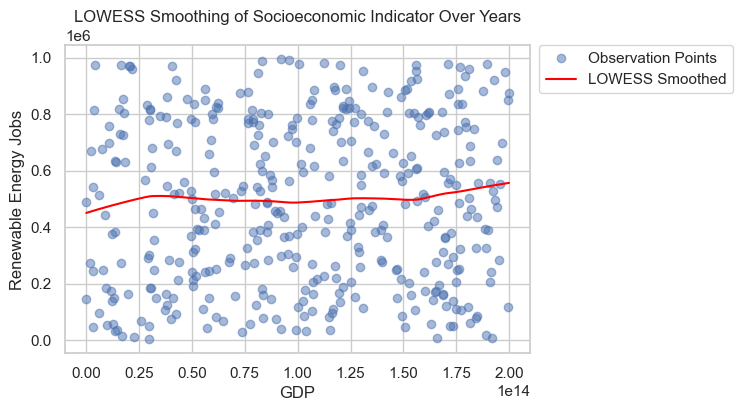

In [13]:
# Fit LOWESS to the data
lowess = sm.nonparametric.lowess(df['Renewable Energy Jobs'], df['GDP'], frac=0.3)

# Plotting results
plt.figure(figsize=(6, 4))
plt.scatter(random_sample_seed['GDP'], random_sample_seed['Renewable Energy Jobs'], alpha=0.5, label='Observation Points')
plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='LOWESS Smoothed')
plt.title('LOWESS Smoothing of Socioeconomic Indicator Over Years')
plt.xlabel('GDP')
plt.ylabel('Renewable Energy Jobs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<h4>Parametric test for Normality</h4>

In [14]:
# Simple Linear Regression
X1 = indicators['Innovation Index']
y1 = indicators['Renewable Energy Jobs']
X1 = sm.add_constant(X1)  # Adds a constant term to the predictor

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     Renewable Energy Jobs   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     5.211
Date:                   Mon, 23 Sep 2024   Prob (F-statistic):             0.0225
Time:                           22:35:50   Log-Likelihood:                -34960.
No. Observations:                   2500   AIC:                         6.992e+04
Df Residuals:                       2498   BIC:                         6.994e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

In [15]:
# Plotting Linear Regression
# Fit a Linear Regression Model

# Reshape the data
X2 = norm_sample_df['Innovation Index'].values.reshape(-1, 1) # Independent variable
y2 = norm_sample_df['Renewable Energy Jobs'].values # Dependent variable

# Create and fit the model
model2 = LinearRegression()
model2.fit(X2, y2)

# Get the slope (coefficient) and intercept
slope = model2.coef_[0]
intercept = model2.intercept_

In [16]:
# Generate predictions
predictions = model2.predict(X2)

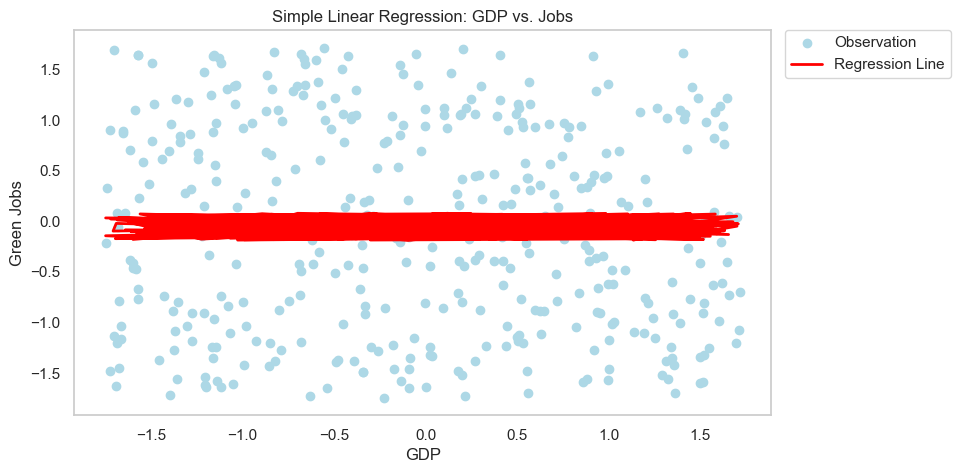

In [17]:
# Create scatter plot
plt.figure(figsize=(9, 5))
plt.scatter(norm_sample_df['Innovation Index'], norm_sample_df['Renewable Energy Jobs'], color='lightblue', label='Observation')

# Plot regression line
plt.plot(norm_sample_df['GDP'], predictions, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
plt.title('Simple Linear Regression: GDP vs. Jobs')
plt.xlabel('GDP')
plt.ylabel('Green Jobs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()

# Show the plot
plt.show()

<h4>Non-Parametric Regression</h4>

In [18]:
# Prepare the data
X3 = norm_sample_df[['GDP', 'Innovation Index', 'Industrialization Rate', 'Production (GWh)']]
y3 = norm_sample_df['Renewable Energy Jobs']

# Encode categorical variables
encoder = LabelEncoder()
X3['GDP'] = encoder.fit_transform(X3['GDP'])
X3['Innovation Index'] = encoder.fit_transform(X3['Innovation Index'])
X3['Industrialization Rate'] = encoder.fit_transform(X3['Industrialization Rate'])
X3['Production (GWh)'] = encoder.fit_transform(X3['Production (GWh)'])

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X3, y3)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X3, y3)

# Make predictions
dt_pred = dt_model.predict(X3)
rf_pred = rf_model.predict(X3)

# Evaluate the models
dt_mse = mean_squared_error(y3, dt_pred)
rf_mse = mean_squared_error(y3, rf_pred)

print(f'Decision Tree MSE: {dt_mse:.2f}')
print(f'Random Forest MSE: {rf_mse:.2f}')

/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_965/1240239976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['GDP'] = encoder.fit_transform(X3['GDP'])
/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_965/1240239976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['Innovation Index'] = encoder.fit_transform(X3['Innovation Index'])
/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_965/1240239976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Decision Tree MSE: 0.00
Random Forest MSE: 0.16


<h4>Feature Importance</h4>

In [19]:
# Initialize LabelEncoder
le_ir = LabelEncoder()
le_gdp = LabelEncoder()
le_prod = LabelEncoder()
le_ii = LabelEncoder()

# Encode categorical variables
norm_sample_df['Industrialization Rate'] = le_ir.fit_transform(norm_sample_df['Industrialization Rate'])
norm_sample_df['GDP'] = le_gdp.fit_transform(norm_sample_df['GDP'])
norm_sample_df['Production (GWh)'] = le_prod.fit_transform(norm_sample_df['Production (GWh)'])
norm_sample_df['Innovation Index'] = le_ii.fit_transform(norm_sample_df['Innovation Index'])

# Check the encoding
print(norm_sample_df[['Industrialization Rate', 'GDP', 'Production (GWh)', 'Innovation Index']].head())

      Industrialization Rate  GDP  Production (GWh)  Innovation Index
1447                     344  183               218               256
1114                     192  328                95               233
1064                     183  150               189               311
2287                     383  178                33                22
1537                     358  264               245               248


In [20]:
# Define features and target variable
X4 = norm_sample_df[['Industrialization Rate', 'GDP', 'Production (GWh)', 'Innovation Index']]
y4 = norm_sample_df['Renewable Energy Jobs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [21]:
# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and fit the model using Decision Tree
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Get feature importance
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X4.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature  Importance
3        Innovation Index    0.271946
0  Industrialization Rate    0.259504
1                     GDP    0.242347
2        Production (GWh)    0.226203


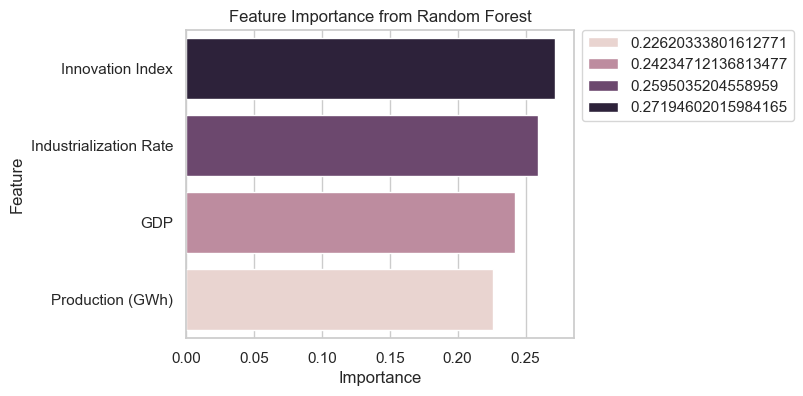

In [23]:
# Plotting feature importance
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Importance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Feature Importance from Random Forest')
plt.show()

<h4>Non Parametric Test for Difference</h4>

In [24]:
# Perform Kruskal-Wallis test

jobs = df['Renewable Energy Jobs'].to_list()
ii = df['Innovation Index'].to_list()
ir = df['Industrialization Rate'].to_list()
gdp = df['GDP'].to_list()
prod = df['Production (GWh)'].to_list()

stat, p = stats.kruskal(jobs, ii, ir, gdp, prod)
print(f'Kruskal-Wallis H-statistic: {stat}, p-value: {p}')


Kruskal-Wallis H-statistic: 11303.24352039362, p-value: 0.0


In [25]:
# Dunn's Post-Hoc Test after Kruskal
dunn_list = [jobs, ii, ir, gdp, prod]
dunn_result = sp.posthoc_dunn(dunn_list, p_adjust='bonferroni') # or holm
print(dunn_result)

               1              2    3              4              5
1   1.000000e+00   0.000000e+00  0.0  1.325558e-142  1.260120e-110
2   0.000000e+00   1.000000e+00  1.0   0.000000e+00  7.975643e-309
3   0.000000e+00   1.000000e+00  1.0   0.000000e+00   0.000000e+00
4  1.325558e-142   0.000000e+00  0.0   1.000000e+00   0.000000e+00
5  1.260120e-110  7.975643e-309  0.0   0.000000e+00   1.000000e+00
